## Problem Statement:
The task is to develop a machine learning model that can accurately classify chest X-ray images into four categories: bacterial pneumonia, viral pneumonia, COVID-19, and normal. Given the significant overlap in visual symptoms in chest X-rays for different diseases, it is crucial to develop a model that can distinguish these conditions effectively, which would aid in faster diagnosis and treatment.

This notebook implements a deep learning approach for classifying chest X-ray images into multiple categories of respiratory conditions, including bacterial pneumonia, viral pneumonia, COVID-19, and normal (healthy) cases. The dataset has been split into training, validation, and test sets using the splitfolders package.

In [1]:
import splitfolders

splitfolders.ratio("New folder", output="dataset",seed=1337, ratio=(.7, .1, .2), group_prefix=None, move=False)

In [2]:
import os 
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

In [4]:
os.chdir(path='C:/Users/sayus/Desktop/Deep Learning/Neural Network/Covid 19/dataset')
dir=os.getcwd()
dir

'C:\\Users\\sayus\\Desktop\\Deep Learning\\Neural Network\\Covid 19\\dataset'

In [5]:
train_data=os.path.join('train')
test_data=os.path.join('test')
val_data=os.path.join('val')

In [8]:
files = os.listdir(train_data)
print(files)

['bacterial_pneumonia', 'covid-19', 'normal', 'viral_pneumonia']


## CNN MODEL

In [10]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [11]:
ip=mod.layers[0].input
op=mod.layers[-2].output

In [13]:
final_output=tf.keras.layers.Flatten()(op)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(128)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(4,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_7')>

In [14]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [15]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [16]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

val_gen = ImageDataGenerator(rescale = 1/255)
val_data_gen = test_gen.flow_from_directory(val_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 4662 images belonging to 4 classes.
Found 1335 images belonging to 4 classes.
Found 665 images belonging to 4 classes.


In [18]:
categories = list(train_data_gen.class_indices.keys())
keys = list(train_data_gen.class_indices.keys())
values = list(train_data_gen.class_indices.values())
print(keys)
print(values)

['bacterial_pneumonia', 'covid-19', 'normal', 'viral_pneumonia']
[0, 1, 2, 3]


In [20]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=100,epochs=50,validation_data=val_data_gen, verbose=2)


Epoch 1/50
100/100 - 66s - loss: 0.6015 - accuracy: 0.7730 - val_loss: 0.6088 - val_accuracy: 0.7993 - 66s/epoch - 657ms/step
Epoch 2/50
100/100 - 60s - loss: 0.6372 - accuracy: 0.7470 - val_loss: 0.7466 - val_accuracy: 0.7558 - 60s/epoch - 598ms/step
Epoch 3/50
100/100 - 60s - loss: 0.6258 - accuracy: 0.7540 - val_loss: 1.4291 - val_accuracy: 0.6262 - 60s/epoch - 599ms/step
Epoch 4/50
100/100 - 60s - loss: 0.5301 - accuracy: 0.7930 - val_loss: 0.4801 - val_accuracy: 0.8097 - 60s/epoch - 601ms/step
Epoch 5/50
100/100 - 60s - loss: 0.5011 - accuracy: 0.8060 - val_loss: 0.5199 - val_accuracy: 0.8007 - 60s/epoch - 599ms/step
Epoch 6/50
100/100 - 60s - loss: 0.5595 - accuracy: 0.7890 - val_loss: 0.7402 - val_accuracy: 0.6974 - 60s/epoch - 600ms/step
Epoch 7/50
100/100 - 60s - loss: 0.5565 - accuracy: 0.7933 - val_loss: 0.5173 - val_accuracy: 0.7775 - 60s/epoch - 598ms/step
Epoch 8/50
100/100 - 60s - loss: 0.5103 - accuracy: 0.8000 - val_loss: 0.4809 - val_accuracy: 0.7895 - 60s/epoch - 601

In [22]:
model.evaluate(test_data_gen , batch_size=1000)

134/134 [==============================] - 18s 131ms/step - loss: 0.4273 - accuracy: 0.8195


[0.4273129403591156, 0.8194756507873535]

In [23]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.7730000019073486, 0.7469757795333862, 0.7540322542190552, 0.7929999828338623, 0.8059999942779541, 0.7889999747276306, 0.7933467626571655, 0.800000011920929, 0.8155242204666138, 0.8009999990463257, 0.8059999942779541, 0.8159999847412109, 0.8145161271095276, 0.800000011920929, 0.8140000104904175, 0.8130000233650208, 0.8190000057220459, 0.843999981880188, 0.8360000252723694, 0.8289999961853027, 0.8185483813285828, 0.8185483813285828, 0.8270000219345093, 0.8199999928474426, 0.8379999995231628, 0.8276209831237793, 0.8119999766349792, 0.8230000138282776, 0.8356854915618896, 0.8578628897666931, 0.8326612710952759, 0.8489999771118164, 0.843999981880188, 0.8159999847412109, 0.8427419066429138, 0.828000009059906, 0.8500000238418579, 0.8650000095367432, 0.8320000171661377, 0.8569999933242798, 0.8460000157356262, 0.8500000238418579, 0.8447580933570862, 0.8550000190734863, 0.8709999918937683, 0.8560000061988831, 0.8550000190734863, 0.8500000238418579, 0.8700000047683716, 0.8539999723434448]
[0.7

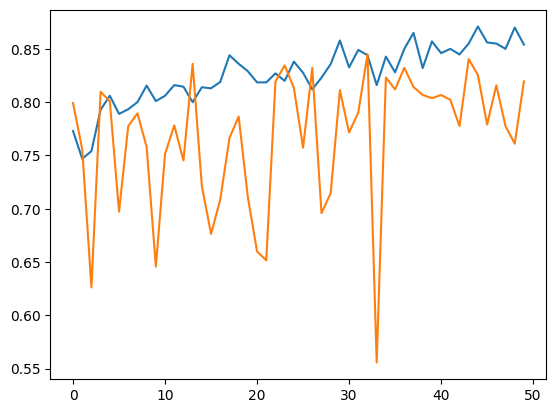

In [24]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

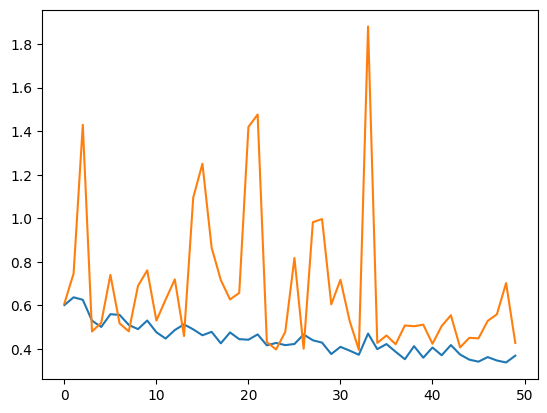

In [33]:
loss = model_fiting.history["loss"]
validation_loss = model_fiting.history["val_loss"]

plt.plot(loss)
plt.plot(validation_loss)
plt.show()

In [26]:
result = model.predict(test_data_gen)

134/134 [==============================] - 18s 122ms/step


In [27]:
result

array([[6.2964702e-01, 1.5983122e-04, 2.5767521e-03, 3.6761647e-01],
       [4.3372700e-01, 8.3600567e-04, 8.7575056e-03, 5.5667949e-01],
       [1.2466695e-05, 9.9997914e-01, 4.1808407e-06, 4.2142783e-06],
       ...,
       [6.0738591e-03, 9.8094451e-01, 6.4026490e-03, 6.5789232e-03],
       [7.7665967e-01, 3.4743578e-05, 5.4553815e-04, 2.2276011e-01],
       [5.8170899e-06, 1.0746730e-08, 9.9991500e-01, 7.9095400e-05]],
      dtype=float32)

1/1 [==============================] - 0s 34ms/step
bacterial_pneumonia
1/1 [==============================] - 0s 30ms/step
covid-19
1/1 [==============================] - 0s 31ms/step
normal
1/1 [==============================] - 0s 42ms/step
normal
1/1 [==============================] - 0s 29ms/step
viral_pneumonia


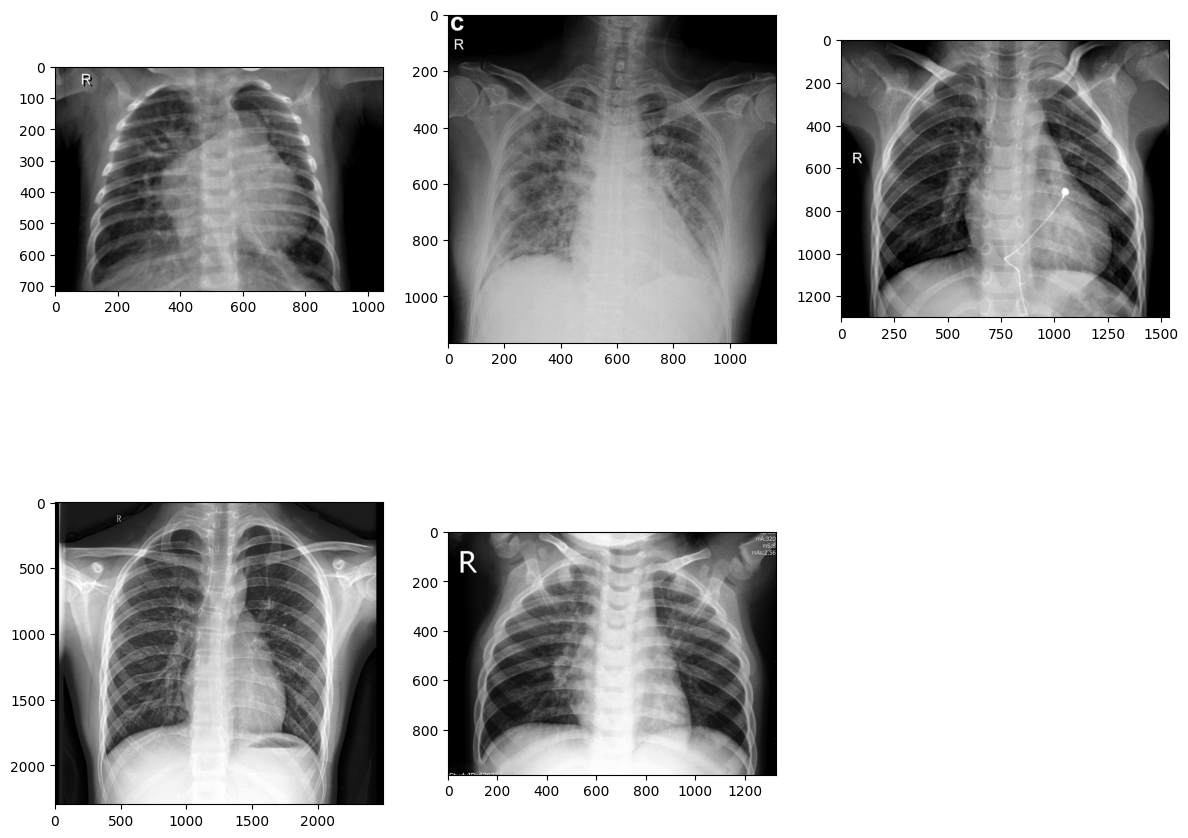

In [31]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

uploading_file = os.listdir('new')
total_images = len(uploading_file)
plt.figure(figsize=(12, 10))

cnt = 1
for fn in uploading_file:
    path = "C:/Users/sayus/Desktop/Deep Learning/Neural Network/Covid 19/dataset/new/" + fn
    image = load_img(path, target_size=(299, 299))
    x = img_to_array(image)
    x = x / 225
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    pred_res = model.predict(images, batch_size=10)
    val_index = values.index(np.argmax(pred_res[0]))
    key_pos = keys[val_index]

    image1 = img.imread(path)
    
    # Adjust the number of subplots based on the number of images
    plt.subplot((total_images // 3) + 1, 3, cnt)  # Adjust the grid size
    plt.imshow(image1)
    
    cnt += 1
    print(key_pos)

plt.tight_layout()
plt.show()


## Analysis:
- Data Splitting: The dataset is split into training, validation, and test sets using a ratio of 70%, 10%, and 20% respectively.
- Data Loading and Preprocessing: The data is loaded from folders representing different classes. Preprocessing steps likely involve resizing images, normalization, and augmentations to make the dataset suitable for deep learning models.
- Modeling Approach: InceptionV3 model is used for the classification along with transfer learning technique.
- Evaluation Metrics: Standard metrics for classification tasks like accuracy, precision, recall, and F1-score would be used to assess the model's performance.